In [183]:
# common 
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import StandardScaler # Standerdizing the data
from imblearn.over_sampling import RandomOverSampler # Oversampling the data

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
init_notebook_mode(connected=True)
cf.go_offline()



# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier




# fine tuning
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')


In [184]:
df = pd.read_csv(R"Diamonds Prices2022.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [186]:
df = df.drop('Unnamed: 0', axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [188]:
df.shape

(53943, 10)

In [189]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

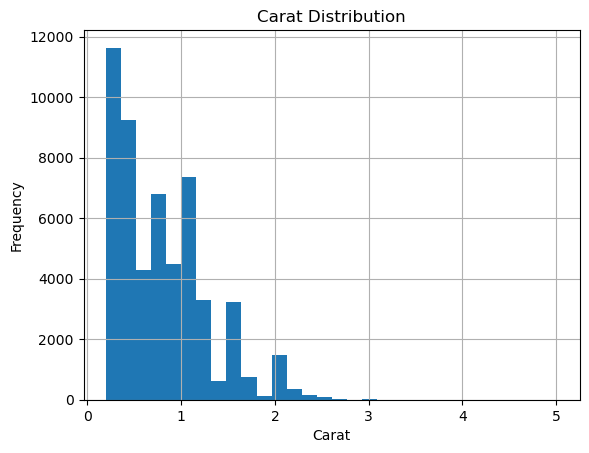

In [190]:
#Carat Counts

plt.hist(df['carat'], bins=30)
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines
plt.title('Carat Distribution')
plt.show()

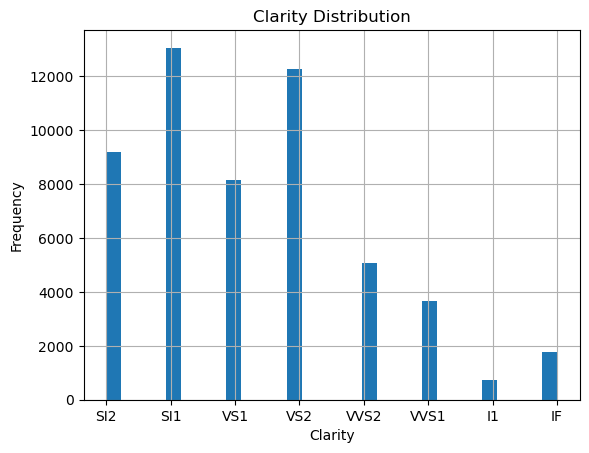

In [191]:
plt.hist(df['clarity'], bins=30)
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines
plt.title('Clarity Distribution')
plt.show()

In [192]:
df["cut"].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [193]:
df["color"].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [194]:
df["clarity"].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [195]:
#Turning objects into numericalf for heatmap

cut_mapping = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
}

df['cut_numeric'] = df['cut'].map(cut_mapping)

color_mapping = {
    'G': 7,
    'E': 6,
    'F': 5,
    'H': 4,
    'D': 3,
    'I': 2,
    'J': 1
}

df['color_numeric'] = df['color'].map(color_mapping)

clarity_mapping = {
    'SI1': 7,
    'VS2': 6,
    'SI2': 5,
    'VS1': 4,
    'VVS2': 3,
    'VVS1': 2,
    'IF': 1,
    'I1': 0
}

df['clarity_numeric'] = df['clarity'].map(clarity_mapping)

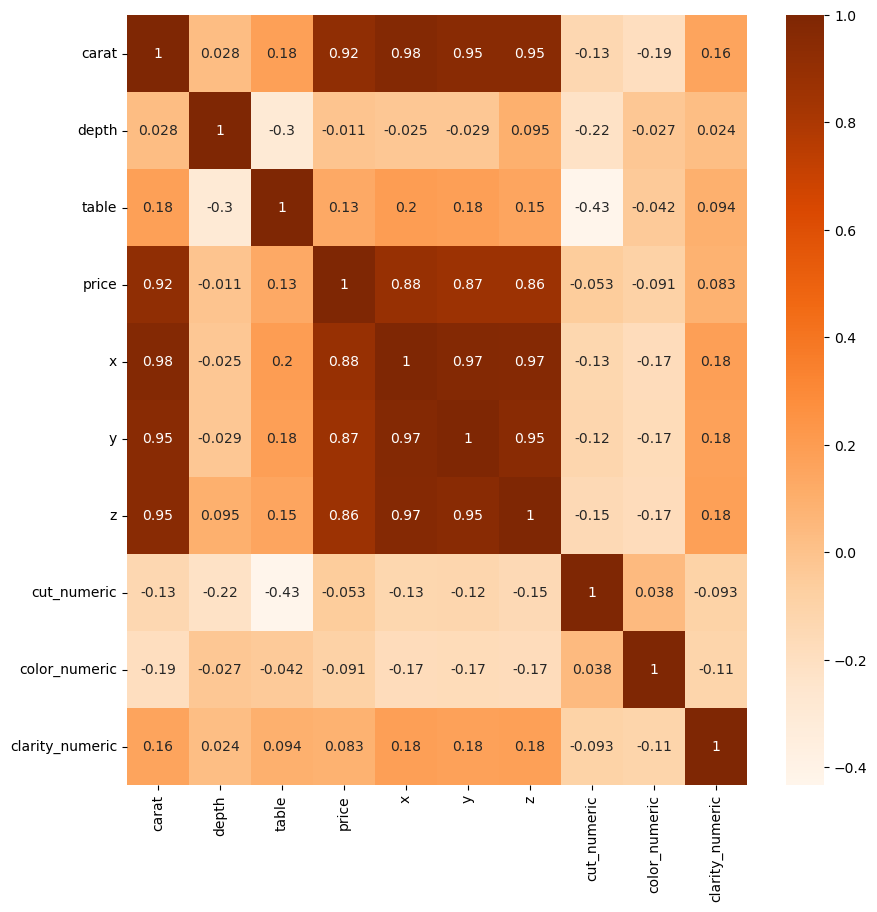

In [196]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.show()

In [197]:
#Dropping cut and color for having low effect

columns_to_drop = ['cut', 'color', "cut_numeric", "color_numeric","clarity", "depth"]
df = df.drop(columns=columns_to_drop)


In [198]:
df = df[df['carat'] <= 2.28]
df

,carat,table,price,x,y,z,clarity_numeric
0,0.23,55.0,326,3.95,3.98,2.43,5
1,0.21,61.0,326,3.89,3.84,2.31,7
2,0.23,65.0,327,4.05,4.07,2.31,4
3,0.29,58.0,334,4.20,4.23,2.63,6
4,0.31,58.0,335,4.34,4.35,2.75,5
...,...,...,...,...,...,...,...
53938,0.86,58.0,2757,6.15,6.12,3.74,5
53939,0.75,55.0,2757,5.83,5.87,3.64,5
53940,0.71,55.0,2756,5.79,5.74,3.49,7
53941,0.71,62.0,2756,5.74,5.73,3.43,7


In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df'
# Assuming you want to predict 'price' based on other features

# Separate the features and the target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 2116529.4855735675
R-squared (R2) Score: 0.8586129446623961


In [200]:
from sklearn.tree import DecisionTreeRegressor

# Assuming your DataFrame is named 'df'
# Assuming you want to predict 'price' based on other features

# Separate the features and the target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1815323.6531623933
R-squared (R2) Score: 0.8787339049350507


In [201]:
from sklearn.svm import SVR

# Assuming your DataFrame is named 'df'
# Assuming you want to predict 'price' based on other features

# Separate the features and the target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 2680375.5684000966
R-squared (R2) Score: 0.8209472575751775


In [202]:
from sklearn.neural_network import MLPRegressor

# Assuming your DataFrame is named 'df'
# Assuming you want to predict 'price' based on other features

# Separate the features and the target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 985084.0168474453
R-squared (R2) Score: 0.9341950445994116
